## Imports

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [2]:
# Carregando o Dataframe e visualizando
url_data = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
df = pd.read_csv(url_data, compression = 'zip')

In [3]:
# Substituindo a string '-' nas colunas
df.columns = [str(i).replace('-','') for i in df.columns.to_list()]
df.rename(columns = {'droga' : 'composto'}, inplace = True) # inplace True para modificar no dataframe
df.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


## Plotting

In [4]:
# correlação entre dados
pd.crosstab(df['dose'], df['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [5]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [6]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [7]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values = df['g0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [8]:
df[['g0', 'g3']]

,g0,g3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


<AxesSubplot:xlabel='g0', ylabel='g3'>

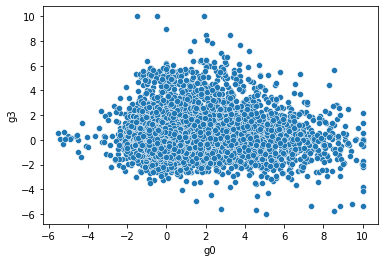

In [9]:
sns.scatterplot(x = 'g0', y = 'g3', data = df)

<AxesSubplot:xlabel='g0', ylabel='g8'>

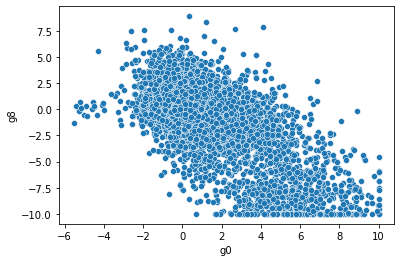

In [12]:
sns.scatterplot(x = 'g0', y = 'g8', data = df)

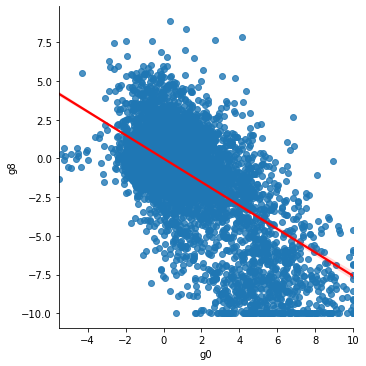

In [14]:
sns.lmplot(data = df, x='g0', y = 'g8', line_kws = {'color': 'red'})

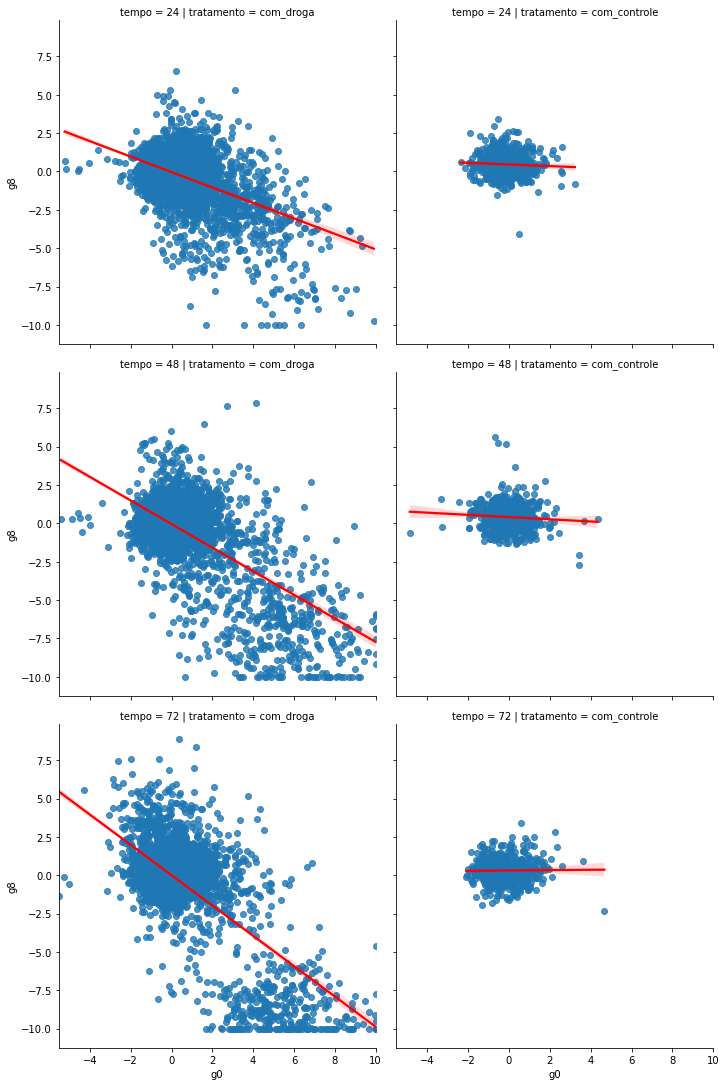

In [16]:
sns.lmplot(data = df, x='g0', y = 'g8', line_kws = {'color': 'red'}, col = 'tratamento', row = 'tempo')

In [19]:
df.loc[:, 'g0':'g771'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


<AxesSubplot:>

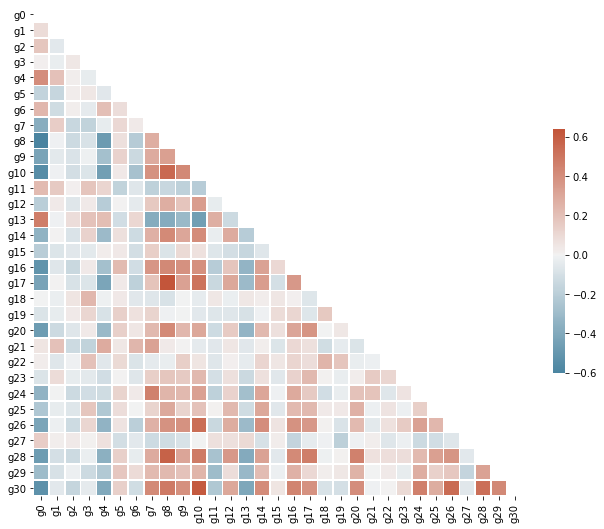

In [27]:
# Compute the correlation matrix
corr = df.loc[:, 'g0':'g30'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

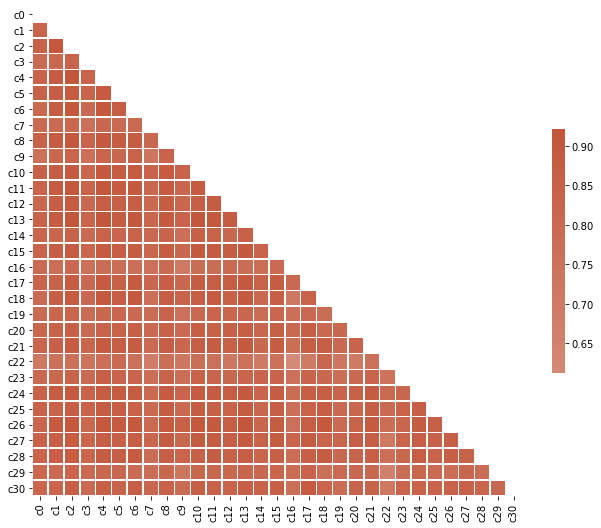

In [28]:
corr_celular = df.loc[:, 'c0':'c30'].corr()
mask = np.triu(np.ones_like(corr_celular, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Desafios

In [10]:
df.groupby([df['dose'], df['tempo']]).mean()

g0        g1        g2        g3        g4        g5  \
dose tempo                                                               
D1   24     0.319991 -0.192720  0.380108  0.089453  0.125577  0.139897   
     48     0.370304 -0.167085  0.243401  0.044661  0.135707  0.072485   
     72     0.240556 -0.170402  0.130965  0.056059  0.060407 -0.141383   
D2   24     0.107051 -0.093355  0.364077  0.168558 -0.104284 -0.197918   
     48     0.198721 -0.000918  0.003619  0.082600  0.017166 -0.339231   
     72     0.239057  0.059175 -0.219225  0.055122  0.100168 -0.391848   

                  g6        g7        g8        g9  ...       c90       c91  \
dose tempo                                          ...                       
D1   24     0.076112 -0.273521 -0.155853  0.213575  ... -0.365947 -0.358154   
     48     0.084382 -0.208612 -0.274800  0.170046  ... -0.475759 -0.494862   
     72     0.068366 -0.232510 -0.243530  0.066881  ... -0.696599 -0.686462   
D2   24     0.058825 -0.165836 -0.069731  0.092676  ... -0.310621 -0.296861   
     48    -0.012804 -0.147517 -0.193738  0.079447  ... -0.423193 -0.421746   
     72    -0.065025 -0.187170 -0.192348  0.091150  ... -0.541467 -0.505247   

                 c92       c93       c94       c95       c96       c97  \
dose tempo                                                               
D1   24    -0.366136 -0.460085 -0.368765 -0.134857 -0.330422 -0.251526   
     48    -0.570062 -0.555525 -0.548392 -0.399752 -0.488049 -0.428309   
     72    -0.851214 -0.667979 -0.787437 -0.644840 -0.732288 -0.574333   
D2   24    -0.271316 -0.376522 -0.294399 -0.089831 -0.266362 -0.205934   
     48    -0.434642 -0.430533 -0.468631 -0.358935 -0.411612 -0.346623   
     72    -0.577718 -0.502814 -0.568560 -0.487043 -0.547923 -0.455735   

                 c98       c99  
dose tempo                      
D1   24    -0.287257 -0.173097  
     48    -0.551867 -0.323624  
     72    -0.739678 -0.517180  
D2   24    -0.223998 -0.164312  
     48    -0.429172 -0.279724  
     72    -0.578388 -0.347332  

[6 rows x 872 columns]